In [1]:
%matplotlib inline
#%pylab
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mpc
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy
from scipy import interpolate
import pandas as pd
import itertools
from root_numpy import root2array, root2rec, tree2rec, array2root
from ROOT import TChain

In [166]:
#df_michel = pd.DataFrame(root2array("~/Desktop/output_t.root","out_tree"))

rec1 = root2array("/Users/vgenty/git/vic_larlite/UserDev/aaa/michel_filter/output_michels.root","out_tree")
rec2 = root2array("/Users/vgenty/git/vic_larlite/UserDev/aaa/michel_filter/output_muons.root"  ,"out_tree")
df_michel = pd.DataFrame(rec1)
df_muon   = pd.DataFrame(rec2)

#print list(df_michel.columns.values)

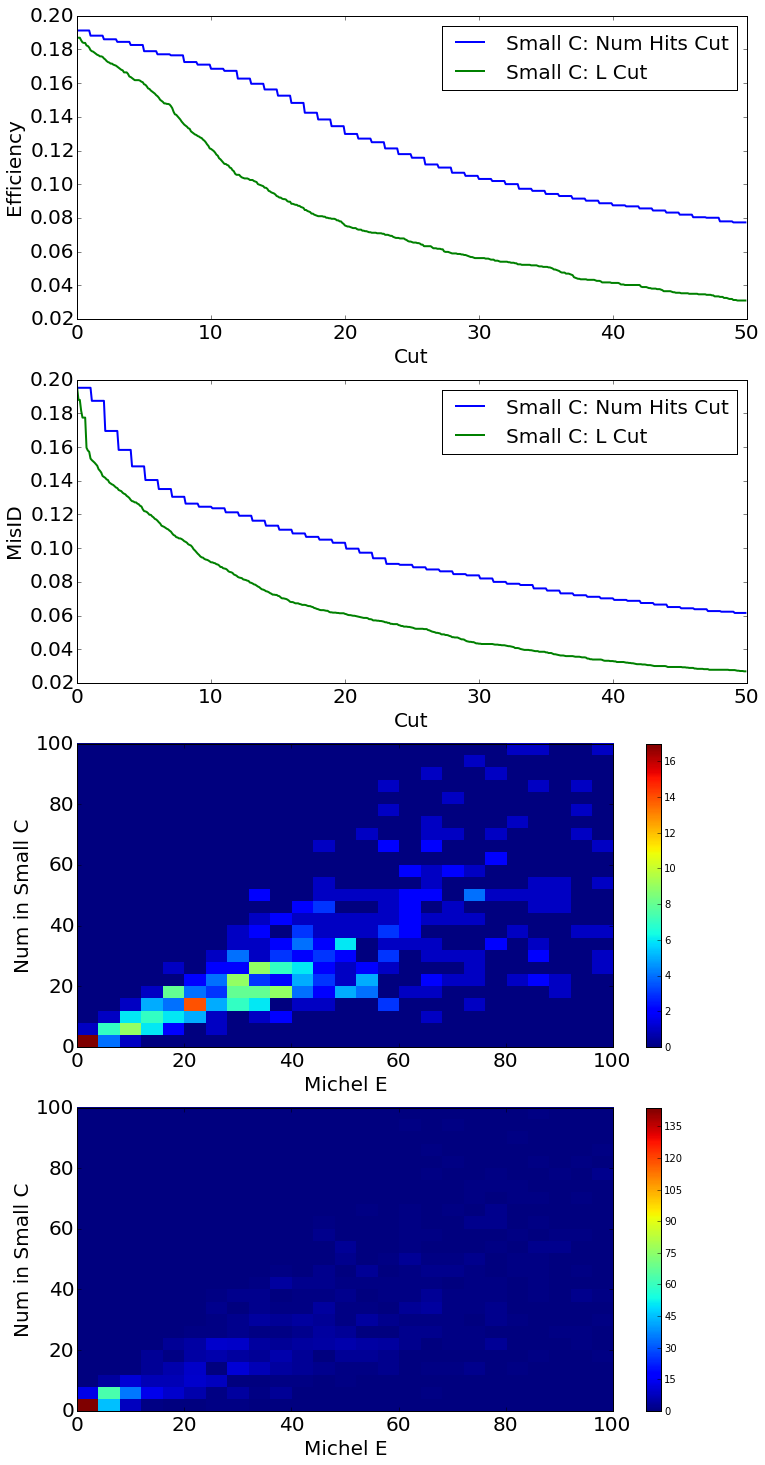

In [3]:
n_michels = 2634
n_muons   = 4366
plt.figure(figsize=(12,25))
Xaxis = np.arange(0,50,0.1)

plt.subplot(4,1,1)
efficiency1 = [len(df_michel[df_michel['_small_cluster_nHits'] > i])/float(len(df_michel) + n_michels) for i in Xaxis]
efficiency2 = [len(df_michel[df_michel['_small_cluster_L'] > i])/float(len(df_michel) + n_michels) for i in Xaxis]

plt.plot(Xaxis,efficiency1,label="Small C: Num Hits Cut",linewidth=2)
plt.plot(Xaxis,efficiency2,label="Small C: L Cut",linewidth=2)
plt.xlabel('Cut',fontsize=20)
plt.ylabel('Efficiency',fontsize=20)
plt.tick_params(labelsize=20)

plt.legend(fontsize=20)

plt.subplot(4,1,2)
misid1 = [len(df_muon[df_muon['_small_cluster_nHits'] >= i])/float(len(df_muon) + n_muons) for i in Xaxis]
misid2 = [len(df_muon[df_muon['_small_cluster_L'] >= i])/float(len(df_muon) + n_muons)     for i in Xaxis]

plt.plot(Xaxis,misid1,label="Small C: Num Hits Cut",linewidth=2)
plt.plot(Xaxis,misid2,label="Small C: L Cut",linewidth=2)
plt.xlabel('Cut',fontsize=20)
plt.ylabel('MisID',fontsize=20)
plt.tick_params(labelsize=20)
plt.legend(fontsize=20)

plt.subplot(4,1,3)
QX = plt.hist2d(df_michel['_michel_E']*0.008*1.4, 
                df_michel['_small_cluster_nHits'], 
                bins = 25,
                range=np.array([(0, 100), (0,100)]))
plt.xlabel('Michel E',fontsize=20)
plt.ylabel('Num in Small C',fontsize=20)
plt.colorbar()
plt.tick_params(labelsize=20)

plt.subplot(4,1,4)
QX = plt.hist2d(df_muon['_michel_E']*0.008*1.4, 
                df_muon['_small_cluster_nHits'], 
                bins = 25,
                range=np.array([(0, 100), (0,100)]))
plt.xlabel('Michel E',fontsize=20)
plt.ylabel('Num in Small C',fontsize=20)
plt.colorbar()
plt.tick_params(labelsize=20)

plt.show()

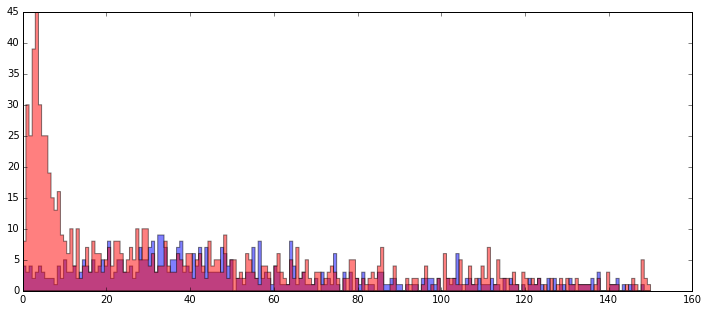

In [8]:
#Signal_Michel_E = df_michel['_michel_E']
step = 0.25
QtoE = 0.008*1.4
binz=200
plt.figure(figsize=(12,5))
xmax = df_michel['_michel_E'].max()*QtoE
xmin = df_michel['_michel_E'].min()*QtoE
xhigh=150

#signalX, signalY = np.histogram(df_michel['_michel_E']*QtoE, bins=np.linspace(xmin, xmax, (xmax-xmin)/step))

(nS, binsS, patchesS) = plt.hist(df_michel['_michel_E']*QtoE,
                       color='b',
                        alpha=0.5, 
                       histtype='stepfilled',
                       bins=binz,
                       range=(0,xhigh))
(nB, binsB, patchesB) = plt.hist(df_muon['_michel_E']*QtoE,
                       color='r',
                        alpha=0.5, 
                       histtype='stepfilled',
                       bins=binz,
                       range=(0,xhigh))
plt.show()
#Significance


In [137]:
def calc_sig(S,B):
    sig = 0
    for i in xrange(len(S)): 
        if (S[i] + B[i]) == 0:
           continue
        sig += S[i]/np.sqrt(S[i]+B[i])
    return sig
def get_michel_E_bins(cutL , cutNhits, xhigh, binz):
    return np.histogram(df_michel[(df_michel['_small_cluster_L'] >= cutL) & (df_michel['_small_cluster_nHits'] >= cutNhits)]['_michel_E']*QtoE,
                            bins=binz,
                            range=(0,xhigh))[0]

def get_muon_E_bins(cutL,cutNhits,xhigh,binz):
    return np.histogram(df_muon[(df_muon['_small_cluster_L'] >= cutL ) & (df_muon['_small_cluster_nHits'] >= cutNhits)]['_michel_E']*QtoE,
                        bins=binz,
                        range=(0,xhigh))[0]

def get_michel_E_bins2(cutL , cutE, xhigh, binz):
    return np.histogram(df_michel[(df_michel['_small_cluster_L'] >= cutL) & (df_michel['_michel_E']*QtoE >= cutE)]['_michel_E']*QtoE,
                            bins=binz,
                            range=(0,xhigh))[0]

def get_muon_E_bins2(cutL,cutE,xhigh,binz):
    return np.histogram(df_muon[(df_muon['_small_cluster_L'] >= cutL ) & (df_muon['_michel_E']*QtoE >= cutE)]['_michel_E']*QtoE,
                        bins=binz,
                        range=(0,xhigh))[0]
def get_michel_E_bins3(cutNH , cutE, xhigh, binz):
    return np.histogram(df_michel[(df_michel['_small_cluster_nHits'] >= cutNH) & (df_michel['_michel_E']*QtoE >= cutE)]['_michel_E']*QtoE,
                            bins=binz,
                            range=(0,xhigh))[0]

def get_muon_E_bins3(cutNH,cutE,xhigh,binz):
    return np.histogram(df_muon[(df_muon['_small_cluster_nHits'] >= cutNH ) & (df_muon['_michel_E']*QtoE >= cutE)]['_michel_E']*QtoE,
                        bins=binz,
                        range=(0,xhigh))[0]

In [19]:
#NO background
true_sig = calc_sig(nS,[0 for i in xrange(len(nS))])
sig_at_bin = calc_sig(np.histogram(df_michel['_michel_E']*QtoE,
                        bins=binz,
                        range=(0,xhigh))[0],np.histogram(df_muon['_michel_E']*QtoE,
                        bins=binz,
                        range=(0,xhigh))[0])

In [21]:
#misid1 = [len(df_muon[df_muon['_small_cluster_nHits'] > i])/float(len(df_muon) + n_muons) for i in Xaxis]
Xaxis  = np.arange(0,50,0.5)
Ldata  = [[calc_sig(get_michel_E_bins(i,j,xhigh,binz),get_muon_E_bins(i,j,xhigh,binz)) for i in Xaxis] for j in Xaxis]

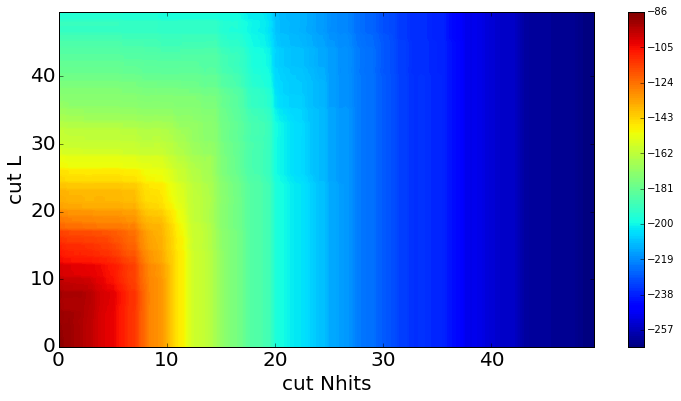

In [146]:
Xaxis  = np.arange(0,50,0.5)
plt.figure(figsize=(12,6))
plt.contourf(Xaxis,Xaxis,Ldata-true_sig,200)
plt.xlabel("cut Nhits",fontsize=20)
plt.ylabel("cut L",fontsize=20)
plt.colorbar()
plt.tick_params(labelsize=20)
plt.show()

In [111]:
Xaxis  = np.arange(0,40,0.5)
Cdata  = [[calc_sig(get_michel_E_bins2(i,j,xhigh,binz),get_muon_E_bins2(i,j,xhigh,binz)) for i in Xaxis] for j in Xaxis]

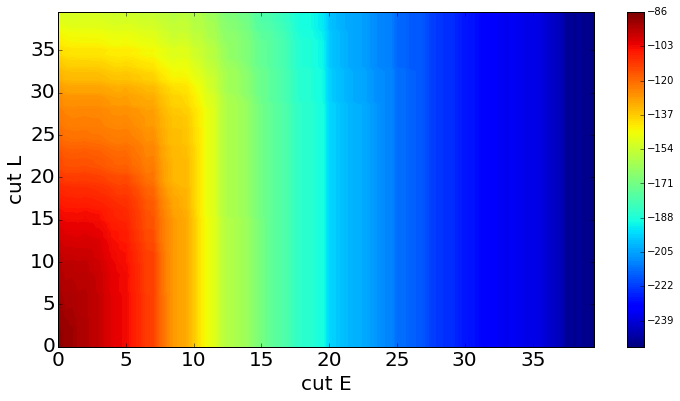

In [147]:
Xaxis  = np.arange(0,40,0.5)
plt.figure(figsize=(12,6))
plt.contourf(Xaxis,Xaxis,Cdata - true_sig,200)
plt.xlabel("cut E",fontsize=20)
plt.ylabel("cut L",fontsize=20)
plt.colorbar()
plt.tick_params(labelsize=20)
plt.show()

In [138]:
Xaxis  = np.arange(0,40,0.5)
Ddata  = [[calc_sig(get_michel_E_bins3(i,j,xhigh,binz),get_muon_E_bins3(i,j,xhigh,binz)) for i in Xaxis] for j in Xaxis]

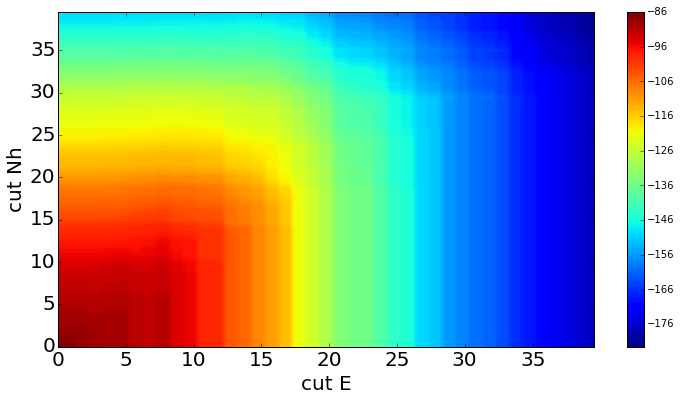

In [144]:
Xaxis  = np.arange(0,40,0.5)
plt.figure(figsize=(12,6))
plt.contourf(Xaxis,Xaxis,Ddata - true_sig,200)
plt.xlabel("cut E",fontsize=20)
plt.ylabel("cut Nh",fontsize=20)
plt.colorbar()
plt.tick_params(labelsize=20)
plt.show()

In [158]:
from numpy import unravel_index
Ldata = np.array(Ldata)
Cdata = np.array(Cdata)
Ddata = np.array(Ddata)

print unravel_index(Ldata.argmax(), Ldata.shape)
print unravel_index(Cdata.argmax(), Cdata.shape)
print unravel_index(Ddata.argmax(), Ddata.shape)

print Ldata[0][0]
print Cdata[0][0]
print Ddata[0][0]

(0, 0)
(0, 0)
(0, 0)
181.911285355
181.911285355
181.911285355


In [157]:
print "@@@333@@@"
print calc_sig(get_michel_E_bins3(0,0,xhigh,binz) ,get_muon_E_bins3(0,0,xhigh,binz))-true_sig
print calc_sig(get_michel_E_bins3(0,30,xhigh,binz),get_muon_E_bins3(0,30,xhigh,binz))-true_sig
print calc_sig(get_michel_E_bins3(30,0,xhigh,binz),get_muon_E_bins3(30,0,xhigh,binz))-true_sig
print "@@@222@@@"
print calc_sig(get_michel_E_bins2(0,0,xhigh,binz) ,get_muon_E_bins2(0,0,xhigh,binz))-true_sig
print calc_sig(get_michel_E_bins2(0,30,xhigh,binz),get_muon_E_bins2(0,30,xhigh,binz))-true_sig
print calc_sig(get_michel_E_bins2(30,0,xhigh,binz),get_muon_E_bins2(30,0,xhigh,binz))-true_sig
print "@@@NONON@@@"
print calc_sig(get_michel_E_bins(0,0,xhigh,binz) ,get_muon_E_bins(0,0,xhigh,binz))-true_sig
print calc_sig(get_michel_E_bins(0,30,xhigh,binz),get_muon_E_bins(0,30,xhigh,binz))-true_sig
print calc_sig(get_michel_E_bins(30,0,xhigh,binz),get_muon_E_bins(30,0,xhigh,binz))-true_sig

@@@333@@@
-86.1035730631
-127.358005138
-157.761007994
@@@222@@@
-86.1035730631
-127.358005138
-227.652386669
@@@NONON@@@
-86.1035730631
-157.761007994
-227.652386669
